# What your Shoes say about you?

## Project description

The goal of this assignment is to predict people's personalities by looking at images of their shoes. For the purpose of this assignment, various shoe types will be assigned to different personality types. This includes the following:
 - Slipper flats, athletic and flat sandals --> Laid back
 - Knee High, Mid-Calf, and Over the Knee Boots --> Take charge
 - Ankle Boots --> Always looking ahead
 - Heels --> Self-confident
 - Sneakers --> Get along with everyone

## Imports

In [17]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

### Preprocessing Training Set

In [18]:
# create data generator specifying 20% of dataset for validation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

# create training set
training_set = train_datagen.flow_from_directory('./data/train/',
                                                 target_size=(64, 64),
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 subset='training')

# create validation set
validation_set = train_datagen.flow_from_directory('./data/train/',
                                                   target_size=(64, 64),
                                                   batch_size=128,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 24491 images belonging to 5 classes.
Found 6121 images belonging to 5 classes.


### Preprocessing Test Set

The Test Set is situated in a distinct folder separate from the training set and comprises a unique set of images that differ from those in the training set. This test set encompasses approximately 20% of the total images within the dataset.

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./data/test/',
                                            target_size=(64, 64),
                                            batch_size=128,
                                            class_mode='categorical')

Found 7551 images belonging to 5 classes.


## Build CNN Model

### 1. Initialize Model

In [20]:
model = tf.keras.models.Sequential()

### 2. Add First Convolution Layer 

In [21]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

### 3. Pool First Layer

In [22]:
model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### 4. Add Second Convolutional Layer

In [23]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))

### 5. Pooling Second Layer

In [24]:
model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### 6. Flatten

In [25]:
model.add(tf.keras.layers.Flatten())

### 7. Full Connection

In [26]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

### 8. Output Layer

Use 5 units since there are 5 classes: 
1. Laid back  
2. Always looking ahead  
3. Get along with everyone  
4. Self-confident  
5. Take charge  

In [27]:
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

### 9. Compile CNN

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

## Train CNN and Evaluate

In [29]:
history = model.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
192/192 [==============================] - 109s 554ms/step - loss: 0.7550 - accuracy: 0.7184 - val_loss: 0.4750 - val_accuracy: 0.8414
Epoch 2/5
192/192 [==============================] - 113s 587ms/step - loss: 0.4807 - accuracy: 0.8263 - val_loss: 0.3840 - val_accuracy: 0.8598
Epoch 3/5
192/192 [==============================] - 104s 540ms/step - loss: 0.4219 - accuracy: 0.8449 - val_loss: 0.3665 - val_accuracy: 0.8651
Epoch 4/5
192/192 [==============================] - 105s 547ms/step - loss: 0.3930 - accuracy: 0.8569 - val_loss: 0.3175 - val_accuracy: 0.8873
Epoch 5/5
192/192 [==============================] - 112s 586ms/step - loss: 0.3742 - accuracy: 0.8631 - val_loss: 0.2825 - val_accuracy: 0.8945


## Check Model Accuracy

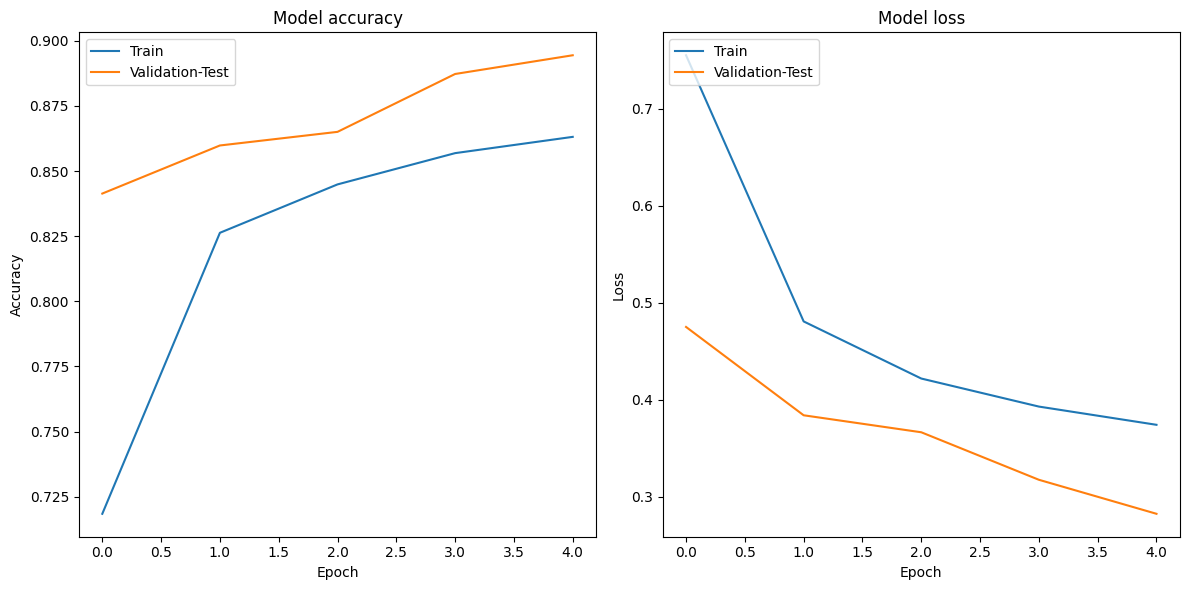

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [31]:
test_accuracy = model.evaluate(test_set, verbose=2)
print(f'Test Accuracy: {test_accuracy[1]}')

59/59 - 11s - loss: 0.3110 - accuracy: 0.8907 - 11s/epoch - 188ms/step
Test Accuracy: 0.8907429575920105


## Analysis and Conclusion

We observe a fairly good accuracy level on the test set of images. This indicates that the model effectively captures distinctive features of various shoe types from the training dataset. While further improvements may be reachable with additional training epochs, for the purpose of this assignment and to ensure a shorter training duration, 5 epochs were chosen, which still results in a fairly good accuracy level.